In [107]:
import numpy as np
import matplotlib.pyplot as plt
from d3s.observables import monomials
from d3s.algorithms import gedmd
from d3s.domain import discretization
from molecular_mpns.math import km_estimators

In [108]:
# Ornstein-Uhlenbeck
alpha,beta = 1,4

def b(x,a = alpha):
    return -a*x

def sigma(x,b = beta):
    return np.sqrt(2/b)*np.ones((1, 1, x.shape[1]))

In [109]:
# reference gedmd
np.random.seed(42)

bounds = np.array([[-2, 2]])
boxes = np.array([1000])
p = 10

Omega = discretization(bounds, boxes)
X_ref = Omega.rand(10000)
Y_ref = b(X_ref)
Z_ref = sigma(X_ref)
psi = monomials(p)

A,d,V = gedmd(X = X_ref,Y = Y_ref,Z = Z_ref,psi = psi,evs = 5,diffusion = True,operator = 'K')

# compute reference drift and diffusion
B,S = np.zeros((1,p+1)),np.zeros((1,p+1))
B[0,1],S[0,2] = 1,1

Lpsi = (A.T)@psi(X_ref)
b_ref,a_ref = B@Lpsi,S@Lpsi
a_ref = a_ref-2*b_ref*X_ref

print(-X_ref-b_ref[0]) # numerically zero
print(a_ref) # 0.5

[[-1.03583808e-12 -2.92468272e-11  1.89737115e-13 ... -2.80471202e-11
  -8.41104963e-13  3.62754271e-12]]
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]


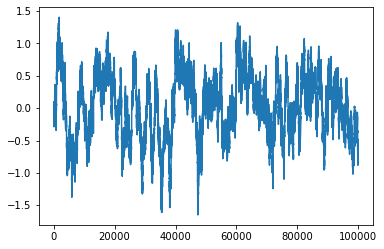

In [110]:
# gedmd with KM estimator
x0,dt = 0,1e-3
nsteps = 100000

ou = OrnsteinUhlenbeck(alpha,beta)
plt.plot(ou_traj[0])
plt.show()
plt.close()

In [129]:
np.random.seed(42)
t_steps = 100
h = (t_steps)*dt
samp_size = 10000

ou_traj = ou.trajectory(x0,dt,nsteps)
Y_km,Z_km = np.zeros((1,samp_size)),np.zeros((1,1,samp_size))

idx = np.random.choice((nsteps-t_steps),samp_size)
X_km = ou_traj[0][idx]
X_km = X_km.reshape((1,samp_size))

for i,idx in enumerate(idx):
    x_current,x_next = ou_traj[0][idx],ou_traj[0][idx+t_steps]
    y,z = km_estimators(x_current,x_next,dt = h)
    z = np.sqrt(z)
    Y_km[:,i] = y
    Z_km[:,:,i] = z
    
A,d,V = gedmd(X = X_km,Y = Y_km,Z = Z_km,psi = psi,evs = 5,diffusion = True,operator = 'K')

# compute km drift and diffusion
B,S = np.zeros((1,p+1)),np.zeros((1,p+1))
B[0,1],S[0,2] = 1,1

Lpsi = (A.T)@psi(X_km)
b_km,a_km = B@Lpsi,S@Lpsi
a_km = a_km-2*b_km*X_km

print(np.mean(-X_km[0]-b_km[0])**2)
print(a_km) 

7.467303002055368e-05
[[0.49036696 0.50261156 0.46764069 ... 0.49647348 0.51453251 0.50640052]]
